# Modelado mecánico en 1D

## Barra 
Para que veamos una aplicación del modelado en 1D, veremos el desplazamiento vertical ($u$, en [m]) de una barra de longitud $L$ sometida a una fuerza por unidad de longitud $f$ [N/m]. Esta fuerza puede ser el peso por unidad de longitud ($f = mg/L$, donde $m$ es la masa y $g$ es la aceleración de la gravedad).

[<img src="barra.png" width="400"/>](barra.png)

Utilizaremos la primera ley de Newton, es decir, $\sum F = 0$. Para esto, tomamos la fuerza en los límites de la barra y además el peso de la barra que actúa en todo el intervalo. Si tomamos $x$ positiva hacia abajo, tenemos la ecuación:

$$A\left( x_{1} \right) \sigma \left(x_{1}\right)-A\left( x_{0} \right) \sigma \left(x_{0}\right)+\int_{x_{0}}^{x_{1}} f \ dx =0$$

Aquí utilizamos la definición de esfuerzo $\sigma = \frac{F}{A}$, $A$ es el área de la sección de la barra. Operando un poco:

$$\frac{A\left( x_{1} \right) \sigma \left(x_{1}\right)-A\left( x_{0} \right) \sigma \left(x_{0}\right) }{x_{1}-x_{0}}=\frac{ -\int_{x_{0}}^{x_{1}} f \ dx}{x_{1}-x_{0}}$$

Si tomamos el límite de $x_{1}$ tendiendo a $x_{0}$ tendremos:

$$\lim_{x_{1}\rightarrow x_{0}}\frac{A\left( x_{1} \right) \sigma \left(x_{1}\right)-A\left( x_{0} \right) \sigma \left(x_{0}\right) }{x_{1}-x_{0}}= \lim_{x_{1}\rightarrow x_{0}}\frac{ -\int_{x_{0}}^{x_{1}} f \ dx}{x_{1}-x_{0}}$$

la parte izquierda de la ecuación es la definición de la derivada, y la derecha es simplemente $-f$ porque es la derivada de la integral.

$$\left(A\sigma\right)^{'} = -f \tag{1}.$$

Según la [ley Hooke](https://es.wikipedia.org/wiki/Ley_de_elasticidad_de_Hooke) $\sigma = E \epsilon$ donde $E$ es el [módulo de Young](https://es.wikipedia.org/wiki/M%C3%B3dulo_de_Young) y $\epsilon$ es la deformación. Cuando estamos en la zona lineal para deformaciones unidimensionales vale la siguiente expresión $\epsilon=\frac{\ell-\ell_{0}}{\ell_{0}}$ ($\ell$ es la longitud variable de la barra y con subíndice cero es la longitud inicial). En nuestro caso, para relacionar la deformación con el desplazamiento utilizaremos la definición [$\epsilon = \frac{\partial u}{\partial x} = u^{'}$](https://es.wikipedia.org/wiki/Deformaci%C3%B3n#Deformaci%C3%B3n_unidimensional). Entonces reemplazando en la Ec. (1) tenemos:

$$-\left(AEu^{'}\right)^{'}=f\tag{2}$$

Si la sección es constante y la barra es del mismo material (homogéno) entonces tanto $A$ como $E$ no serán funciones de $x$, serán constantes. Entonces queda:

$$-AEu^{''}=f\tag{3}$$

esta es la ecuación de Poisson que ya vimos en el tutorial de [Elementos Finitos en 1D](https://nbviewer.jupyter.org/github/rirastorza/Intro2FEM/blob/master/Elementos_finitos_en_1D/fem1D.ipynb). Se resuelve de la misma forma.

## Condiciones de frontera

En esta sección veremos el significado mecánico de los diferentes tipos de condiciones de frontera (o borde, o contorno):

- [Dirichlet](https://en.wikipedia.org/wiki/Dirichlet_boundary_condition)
- [Neumann](https://es.wikipedia.org/wiki/Condici%C3%B3n_de_frontera_de_Neumann)
- [Robin](https://es.wikipedia.org/wiki/Condici%C3%B3n_de_frontera_de_Robin)

### Condición de Dirichlet

En esta condición se pide que la frontera tenga un desplazamiento conocido, puede ser constante o variable, pero debe ser conocido. Nosotros tomaremos la primer opción, es decir, si $x_{0}$ es la frontera entonces:

$$u\left(x_{0}\right) = g_{0} \tag{4}$$

donde $g_{0}$ es una constante. Por ejemplo: si en $x_{0}=0 $ m la barra está amurada a la pared (ver Figura (a), al final del tutorial), el desplazamiento será nulo, por lo tanto lo escribiremos:

$$u\left(0\right) = 0$$

Remarcamos que aquí debemos conocer una constante $g_{0}$.

### Condición de Neumann

Para imponer una condición de esfuerzo tomaremos una condición de Neumann, que se define como:

$$ u^{'}\left(x_{0}\right) = \ \text{constante} \tag{5}$$

es decir, la derivada del desplazamiento debe ser constante. Aquí la escribiremos de la forma:

$$A\underbrace{Eu^{'}\left(x_{0}\right)}_{\sigma\left(x_{0}\right)} = g_{0}\Rightarrow \underbrace{A\sigma\left(x_{0}\right)}_{F\left(x_{0}\right)} = g_{0}$$

quiere decir que la condición está imponiendo una fuerza constante en $x_{0}$. Por ejemplo, que la barra tenga colgada una masa en ese extremo (ver Figura (b)).

Aquí nuevamente necesitamos una sola constante para definir la condición, $g_{0}$.

### Condición de Robin

Esta condición es una mezcla de las dos anteriores. Utilizaremos la expresión:

$$AEu^{'}\left(x_{0}\right) = k_{0}\left(u\left(x_{0}\right)-g_{0}\right) \tag{6}$$

Se puede pensar como una barra sujeta a un resorte de constante $k_{0}$, noten que la fuerza del resorte será $k_{0}\left(u\left(x_{0}\right)-g_{0}\right)$ (ver Figura (c)). 

Noten que aquí necesitamos dos constantes: $k_{0}$ y $g_{0}$.

[<img src="barrabordes.png" width="800"/>](barrabordes.png)


## Ejemplo aplicando condición de Neumann 

En esta sección desarrollaremos un ejemplo de aplicación en FEniCS donde utilizaremos el modelo de la Figura (b). Es decir, una barra cargada por una masa $M$ (la fuerza ejercida será $Mg$) y su propio peso.

Para esto debemos reutilizar parte del código que vimos en la sección del tutorial de [este enlace](https://github.com/rirastorza/Intro2FEM/blob/master/Elementos_finitos_en_1D/fem1D_introFEniCS.ipynb). Con la diferencia que ahora partimos de una formulación variacional un poco más completa.

$$AE\left [\int_{0}^{L}v^{'}u^{'}dx + u^{'}(0)v(0) - u^{'}(L)v(L)\right ] = \int_{0}^{L} fvdx \tag{7}$$

Aquí el término con $v(0)$ no nos interesa porque en ese borde la condición es de Dirichlet, pero en el caso de $v(L)$ aparece $u^{'}(L)$ y en este caso, habrá una condición de borde de Neumann. Entonces nos quedamos con:

$$AE\int_{0}^{L}v^{'}u^{'}dx - \underbrace{AEu^{'}(L)}_{Mg}v(L) = \int_{0}^{L} fvdx \tag{8},$$

operando un poco llegamos a la expresión:

$$AE\int_{0}^{L}v^{'}u^{'}dx  = \int_{0}^{L} fvdx + \int_{\Gamma_{N}} Mg \ v \ ds \tag{9},$$

Aquí hay un término del que todavía no hemos hablado nunca ($\int_{\Gamma_{N}} Mg \ v \ ds$). En palabras podemos decir que es la forma de decirle a FEniCS que el valor de $u^{'}$ en el borde (dominio $\Gamma_{N}$) tiene que ser $Mg$ en la dirección normal, por eso utilizamos $ds$ que es el diferencial en el borde. En este caso es un punto, si trabajamos en 2D será una línea y en 3D una superficie. Ya hablaremos con más detalle más adelante.

Entonces, la primera parte del código será parecida a lo que ya hemos visto.

### Código en FEniCS

Ejecutar este documento en forma dinámica: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rirastorza/Intro2FEM/blob/master/Elementos_finitos_en_1D/mecanica1D.ipynb)


Para correr en google colab ejecutar la siguientes instrucciones (https://fem-on-colab.github.io/).


In [1]:
from __future__ import print_function
from fenics import *
# Defino la malla
nx = 10 #numero de intervalos
l0 = 1.0 #Longitud 1 m
Mg = 2.0 #en Newtons
A = 0.01*0.01 #sección 1cmx1cm
E = 210.0e9 #210 GPa
rho = 7850.0 #kg/m**3
vol = A*l0
g = 9.81 #m/s**2
minx, maxx= 0.0, l0 
mesh = IntervalMesh(nx, minx, maxx)#malla en 1D 
V0 = FunctionSpace(mesh, 'CG',1)#Continuous Lagrange elements

# Defino la condición de borde de Dirichlet
def borde_Ar(x, on_boundary): 
    tol = 1.E-14
    return on_boundary and near(x[0], 0.0, tol)


class borde_Ab(SubDomain):
    def inside(self, x, on_boundary):
        tol = 1E-14
        l0 = 1.0
        return on_boundary and near(x[0], l0, tol)

La única diferencia es la clase *borde_Ab* en la cual creamos una función para marcar el borde de abajo.

In [2]:
#Función de la malla con parámetro que indica la topología
marcador_borde = MeshFunction("size_t", mesh, mesh.topology().dim()-1, 0)
#Marcadores en el borde de abajo
b_ab = borde_Ab()
b_ab.mark(marcador_borde, 20)

Luego, definimos el diferencial del borde (subdominio) a partir del marcador creado (*marcador_borde*).

In [3]:
ds = Measure('ds', domain=mesh, subdomain_data=marcador_borde)
bc_ar = DirichletBC(V0, Constant(0.0), borde_Ar)
bc = [bc_ar]

Entonces, ya tenemos marcado con el valor 20 el borde de abajo, en el que vamos a poner el peso $Mg$. Comenzamos a escribir la formulación variacional tal como está escrito en la Ec. (9).

In [4]:
u = TrialFunction(V0)
v = TestFunction(V0)
f = Constant(rho*vol*g/l0)

a = A*E*dot(grad(u), grad(v))*dx
L = f*v*dx+(Mg)*v*ds(20)

Ahora, resuelvo y grafico.

Solving linear variational problem.
Cantidad de celdas: 10
Cantidad de vertices: 11
Masa barra:  7.700850000000001
Solución analítica:  9.523809523809524e-08


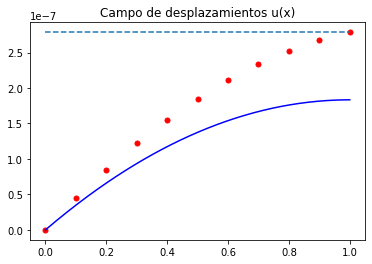

In [5]:
u = Function(V0)
solve(a == L, u, bc)


import matplotlib.pyplot as plt

#Extraigo los datos de la solucion u.
uh = u.compute_vertex_values(mesh) 

print('Cantidad de celdas:',nx)
print('Cantidad de vertices:',len(uh))
print('Masa barra: ', rho*vol*g)
print('Solución analítica: ',(Mg*l0/(A*E)))

fig, axs = plt.subplots(1,1)

import numpy as np

xu = np.linspace(0.0, 1.0, len(uh),endpoint = True)
xt = np.linspace(0.0, 1.0, 200,endpoint = True)
ut = rho*g*(l0*xt-xt*xt/2.0)/E

axs.plot(xu,uh,'ro',markersize=5)
axs.plot(xt,ut,'b')
axs.hlines((Mg*l0/(A*E))+ut[-1],0,l0,linestyles='dashed')
plt.title('Campo de desplazamientos u(x)')
plt.show();

Aquí estamos comparando con los valores teóricos que encontramos [aquí](https://engcourses-uofa.ca/books/introduction-to-solid-mechanics/approximate-methods/approximate-methods-the-rayleigh-ritz-method/bars-under-axial-loads/). En azul, está la solución del desplazamiento si sólo estuviera actuando el peso de la barra (verifíquelo colocando $Mg = 0$). En línea punteada está el límite utilizando la ley de Hooke:

$$\frac{Mg}{A} = E \frac{\ell_{f}-\ell_{0}}{\ell_{0}} \Rightarrow \ell_{f}-\ell_{0} = \ell_{0}\frac{Mg}{AE}$$

y a esto le sumamos el desplazamiento de la punta de la barra por su propio peso (en el código $ut[-1]$).